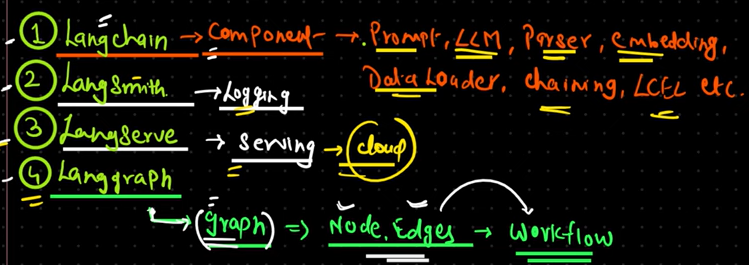

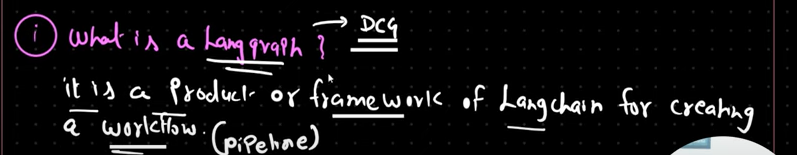

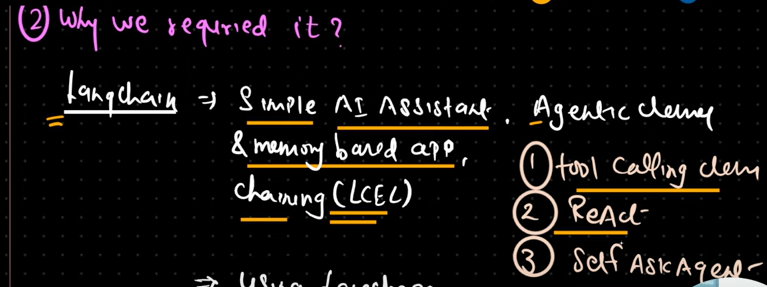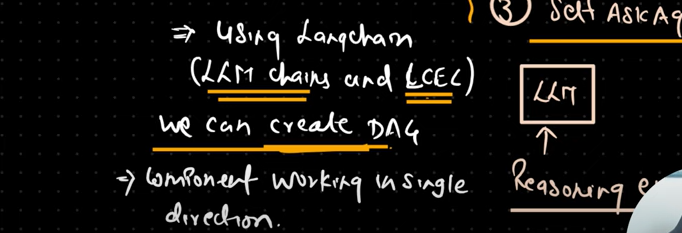

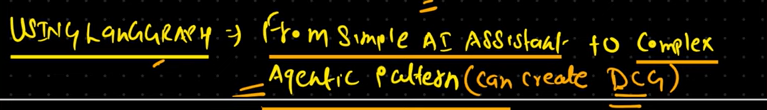

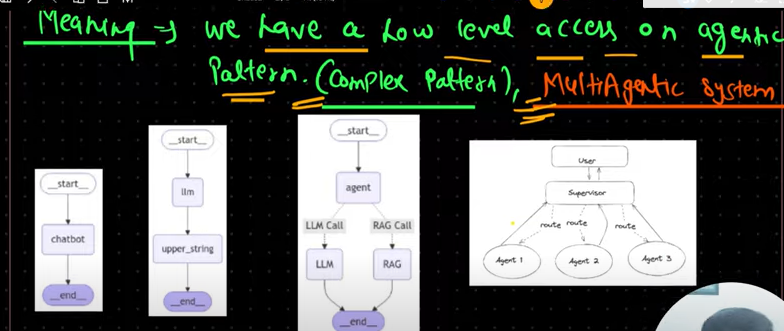

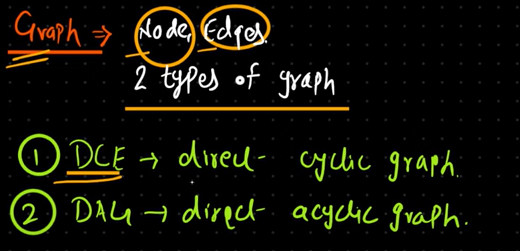

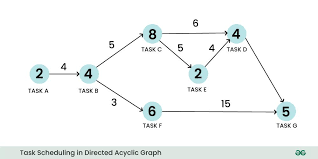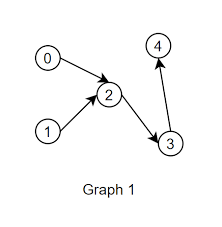

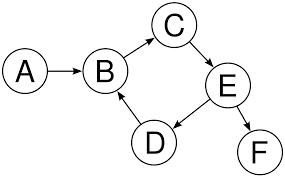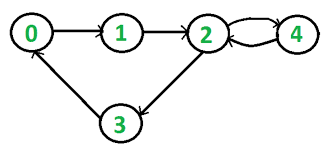

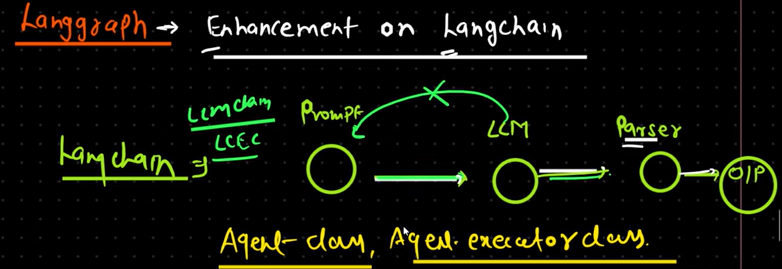
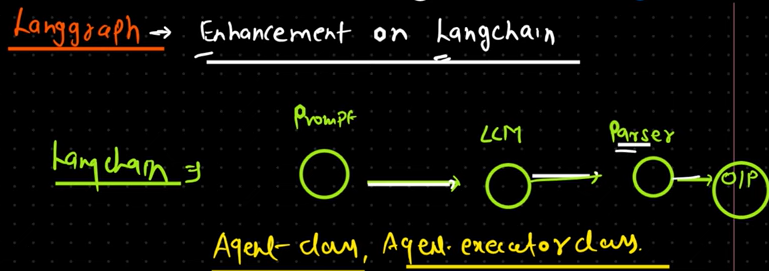

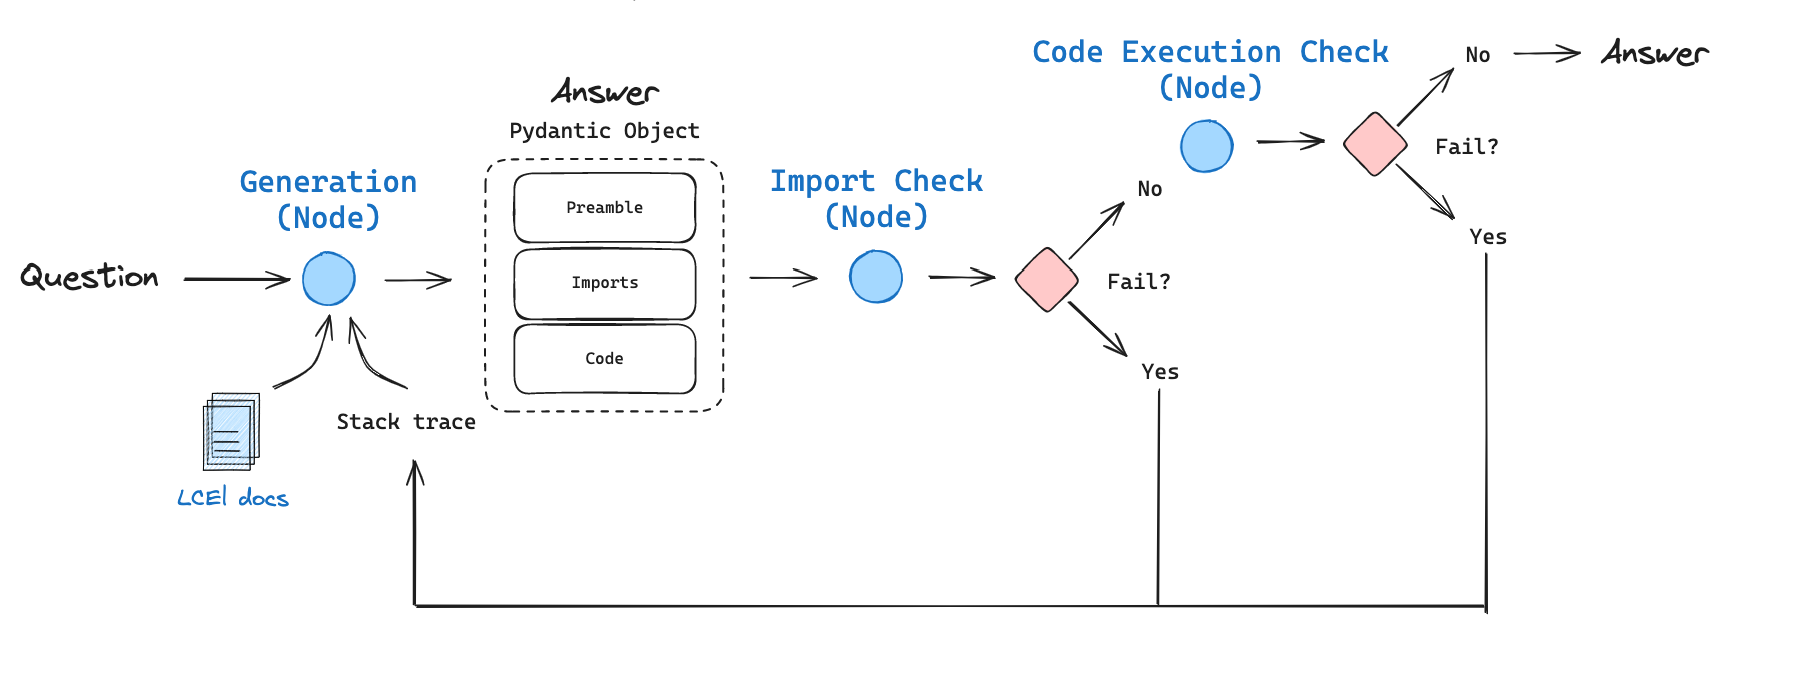

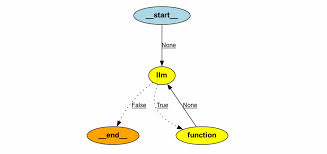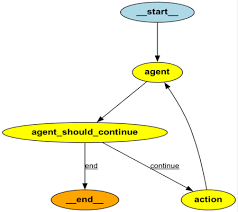

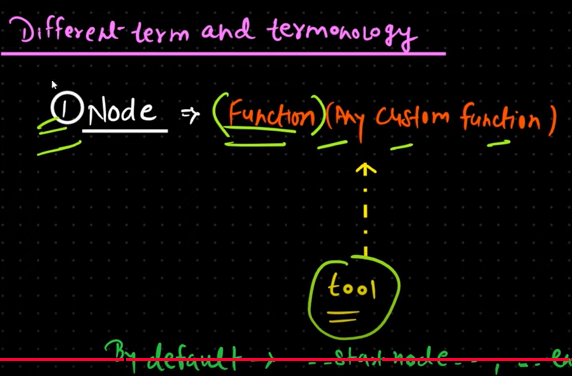

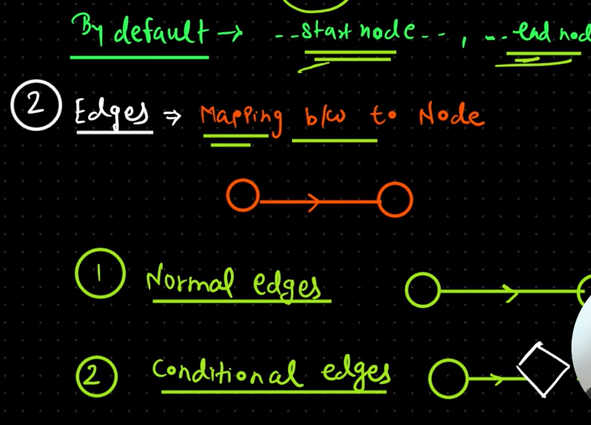

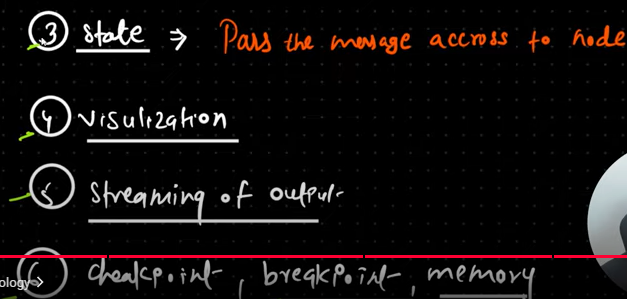

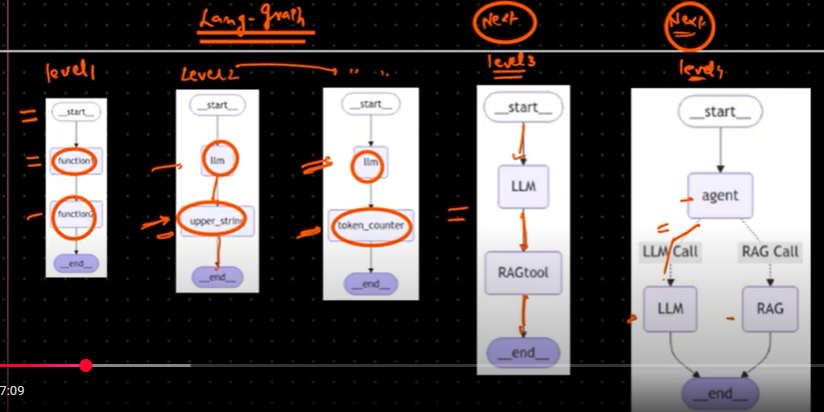

In [1]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output=function3("this is function 3 in between")
    return input2 + " " + output + " and sam from second function"

# show this later on
def function3(input3):
    return input3

In [2]:
from langgraph.graph import Graph

In [3]:
workflow1=Graph()

In [4]:
workflow1.add_node("function1", function1)

In [5]:

workflow1.add_node("function2",function2)

In [6]:
workflow1.add_edge("function1","function2")

In [7]:

workflow1.set_entry_point("function1")

In [8]:

workflow1.set_finish_point("function2")

In [10]:
workflow1

In [9]:
app1=workflow1.compile()

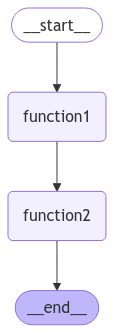

In [11]:
app1

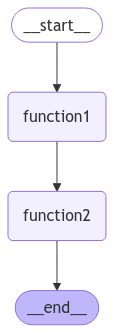

In [12]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [13]:
app1.invoke("hi this is virat ")

'hi this is virat from first function this is function 3 in between and sam from second function'

In [14]:

input="hi this is virat "

In [15]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
hi this is virat from first function


here is output from function2
_______
hi this is virat from first function this is function 3 in between and sam from second function




In [16]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GEMINI_API_KEY")
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

In [17]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content

'Hello! How may I assist you today?'

In [18]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
    response=llm.invoke(input).content
    return response

In [19]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [20]:
from langgraph.graph import Graph
workflow2=Graph()

In [21]:
workflow2.add_node("llm",function1)

In [22]:
workflow2.add_node("upper_string",function2)

In [23]:
workflow2.add_edge("llm","upper_string")

In [24]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [25]:
app2=workflow2.compile()

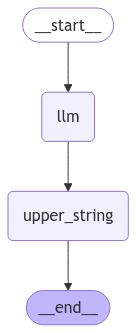

In [26]:
app2

In [27]:
app2.invoke("what is a name of first indian prime minister?")

'JAWAHARLAL NEHRU'

In [28]:
print(app2.invoke("what is genai explain in detail?"))

**GENAI (GENERATIVE ARTIFICIAL INTELLIGENCE)**

**DEFINITION:**

GENAI REFERS TO A SUBSET OF ARTIFICIAL INTELLIGENCE (AI) THAT FOCUSES ON GENERATING NEW DATA, CONTENT, OR EXPERIENCES FROM EXISTING DATA OR PATTERNS. UNLIKE TRADITIONAL AI SYSTEMS THAT PRIMARILY PROCESS AND ANALYZE DATA, GENAI SYSTEMS CAN CREATE ORIGINAL AND UNIQUE OUTPUTS.

**KEY CHARACTERISTICS:**

* **GENERATIVE:** GENAI ALGORITHMS GENERATE NEW DATA OR CONTENT THAT IS SIMILAR TO OR COMPLEMENTS EXISTING DATA.
* **DATA-DRIVEN:** GENAI SYSTEMS ARE TRAINED ON LARGE DATASETS, FROM WHICH THEY LEARN PATTERNS AND RELATIONSHIPS.
* **UNPREDICTABLE:** GENAI OUTPUTS ARE NOT FULLY PREDICTABLE, AS THEY OFTEN INVOLVE AN ELEMENT OF RANDOMNESS.
* **CREATIVE:** GENAI CAN PRODUCE NOVEL AND IMAGINATIVE RESULTS THAT MAY DIFFER FROM HUMAN-GENERATED CONTENT.

**TYPES OF GENAI:**

GENAI ENCOMPASSES VARIOUS SUBFIELDS, INCLUDING:

* **NATURAL LANGUAGE GENERATION (NLG):** CREATES HUMAN-LIKE TEXT, SUCH AS ARTICLES, STORIES, AND CHATBOTS.
* **IMAG

In [29]:
input="what is a name of first indian prime minister?"

In [30]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Jawaharlal Nehru


here is output from upper_string
_______
JAWAHARLAL NEHRU




In [32]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [33]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

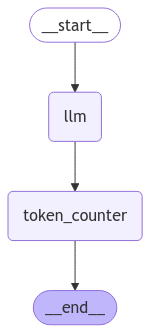

In [34]:
app3

In [35]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 2'

In [36]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:'},
 {'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'}]

rag add

In [37]:

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [38]:
loader=DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()

In [40]:
docs

[Document(metadata={'source': 'data\\data1.txt'}, page_content='Introduction to quantum computing\nTo fully define quantum computing, we need to define some key terms first.\n\nWhat is quantum?\nThe quantum in "quantum computing" refers to the quantum mechanics that the system uses to calculate outputs. In physics, a quantum is the smallest possible discrete unit of any physical property. It usually refers to properties of atomic or subatomic particles, such as electrons, neutrinos, and photons.\n\nWhat is a qubit?\nA qubit is the basic unit of information in quantum computing. Qubits play a similar role in quantum computing as bits play in classical computing, but they behave very differently. Classical bits are binary and can hold only a position of 0 or 1, but qubits can hold a superposition of all possible states.\n\nWhat is quantum computing?\nQuantum computers harness the unique behavior of quantum physics—such as superposition, entanglement, and quantum interference—and apply it

In [41]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)

In [42]:
new_docs

[Document(metadata={'source': 'data\\data1.txt'}, page_content='Introduction to quantum computing'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='To fully define quantum computing, we need to define some key terms first.'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='What is quantum?'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='The quantum in "quantum computing" refers to the quantum mechanics that the system uses to'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='to the quantum mechanics that the system uses to calculate outputs. In physics, a quantum is the'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='calculate outputs. In physics, a quantum is the smallest possible discrete unit of any physical'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='smallest possible discrete unit of any physical property. It usually refers to properties of atomic'),
 Document(metadata={'

In [43]:
doc_strings = [doc.page_content for doc in new_docs]

In [44]:
doc_strings

['Introduction to quantum computing',
 'To fully define quantum computing, we need to define some key terms first.',
 'What is quantum?',
 'The quantum in "quantum computing" refers to the quantum mechanics that the system uses to',
 'to the quantum mechanics that the system uses to calculate outputs. In physics, a quantum is the',
 'calculate outputs. In physics, a quantum is the smallest possible discrete unit of any physical',
 'smallest possible discrete unit of any physical property. It usually refers to properties of atomic',
 'It usually refers to properties of atomic or subatomic particles, such as electrons, neutrinos, and',
 'particles, such as electrons, neutrinos, and photons.',
 'What is a qubit?',
 'A qubit is the basic unit of information in quantum computing. Qubits play a similar role in',
 'quantum computing. Qubits play a similar role in quantum computing as bits play in classical',
 'in quantum computing as bits play in classical computing, but they behave very diff

In [45]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [47]:
retriever

VectorStoreRetriever(tags=['Chroma', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x00000210BAD9BB50>, search_kwargs={'k': 3})

In [48]:
query = "what is quantum computing ?"
docs = retriever.get_relevant_documents(query)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8460\94373135.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


In [49]:
docs

[Document(metadata={'source': 'data\\data1.txt'}, page_content='To fully define quantum computing, we need to define some key terms first.'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='What is quantum computing?'),
 Document(metadata={'source': 'data\\data1.txt'}, page_content='and quantum interference—and apply it to computing. This introduces new concepts to traditional')]

In [50]:
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': 'data\\data1.txt'}
To fully define quantum computing, we need to define some key terms first.
page_content='To fully define quantum computing, we need to define some key terms first.' metadata={'source': 'data\\data1.txt'}
page_content='What is quantum computing?' metadata={'source': 'data\\data1.txt'}
page_content='and quantum interference—and apply it to computing. This introduces new concepts to traditional' metadata={'source': 'data\\data1.txt'}


In [52]:
AgentState={}

In [53]:
AgentState["messages"]=[]

In [54]:
AgentState

{'messages': []}

In [51]:
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1] # llm response
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [55]:
AgentState["messages"].append("hi, how are you?")

In [56]:
AgentState["messages"].append("hi, what you doing?")

In [57]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [59]:
AgentState['messages'][0]

'hi, how are you?'

In [60]:
AgentState['messages'][-1]

'hi, what you doing?'

In [58]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [61]:
# Define a Langchain graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

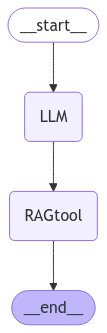

In [62]:
app4

In [63]:
inputs = {"messages": ["Tell me about quantum entanglement"]}

In [64]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about quantum entanglement', 'Quantum entanglement is a physical phenomenon in which two or more particles are linked together in such a way that the state of one particle can instantly affect the state of the other, even if they are separated by a large distance.']}

---

Output from node 'RAGtool':
---
Quantum entanglement is the ability of quantum particles to correlate their measurement results with each other. When qubits are entangled, they form a single system and influence each other.

---



In [65]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [ ]:
# 1. TypedDict
# A TypedDict is a dictionary with a specific set of keys and value types.
# It's useful for defining the structure of a dictionary, making your code more readable and self-documenting.
# 2. Annotated
# Annotated is a type hint that allows you to attach additional metadata to a type.
# It's typically used with other type hints, like List or Dict, to provide more context about the expected data.
# 3. Sequence
# A Sequence is an ordered collection of values, like a list or a tuple.
# It's a useful type hint when you need to work with a sequence of values, but you don't care about the specific type of sequence.
# 4. Any
# Any is a type hint that indicates a value can be of any type.
# It's often used when you're working with dynamic or unknown data, but be careful: using Any can make your code less type-safe!
# Here's an example of how you might use these types:
# Python
# from typing import TypedDict, Annotated, Sequence, Any

# class User(TypedDict):
#     name: str
#     age: int

# def process_users(users: Sequence[User]) -> None:
#     for user in users:
#         print(user["name"], user["age"])

# def dynamic_function(input_value: Any) -> Any:
#     # Be careful with Any!
#     return input_value

# # Example usage:
# users = [
#     {"name": "John", "age": 30},
#     {"name": "Jane", "age": 25}
# ]
# process_users(users)

# dynamic_function("Hello")  # Returns "Hello"
# dynamic_function(42)  # Returns 42



In [66]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [67]:

from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [68]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [ ]:

print(parser.get_format_instructions())

In [69]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [70]:
template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about India's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

In [72]:
state={"messages": ["Tell me about India's Industrial Growth"]}

In [73]:

function_1(state)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The user query contains 'India's Industrial Growth', which is related to India."


{'messages': ['India']}

In [74]:

function_1(state)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query is about India's Industrial Growth"


{'messages': ['India']}

In [75]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [76]:
function_2({'messages': ['India']})

-> Calling RAG ->
India
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


{'messages': ['The provided context does not mention anything about India, so I cannot answer this question from the provided context.']}

In [77]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Answer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [78]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1] # fetching the last message agent answers
    print(last_message)
    if 'India' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [79]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState
workflow5.add_node("agent", function_1)
workflow5.add_node("RAG", function_2)
workflow5.add_node("LLM", function_3)
workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)
workflow5.add_edge("LLM",END)
app5=workflow5.compile()

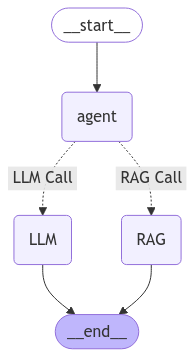

In [80]:
app5

In [81]:
inputs = {"messages": ["Tell me about India's Industrial Growth"]} # state

In [82]:
output = app5.invoke(inputs)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The user query is about India's Industrial Growth"
-> Router ->
India
-> Calling RAG ->
Tell me about India's Industrial Growth
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]
